In [23]:
import pandas as pd
from pathlib import Path
import re

data_dir = Path("data/clean_csv")

all_rows = []

for file in sorted(data_dir.glob("*.csv")):
    match = re.match(r"(\d+)-(\d+)\.csv", file.name)
    if not match:
        continue
    year, month = match.groups()
    year = int("20" + year) if len(year) == 2 else int(year)
    month = int(month)
    
    df = pd.read_csv(file)
    
    df["year"] = year
    df["month"] = month
    
    all_rows.append(df)

data = pd.concat(all_rows, ignore_index=True)

data = data.sort_values(["year", "month", "category"]).reset_index(drop=True)

print("Combined shape:", data.shape)
data.head()


Combined shape: (790, 12)


,category,supplier_sum,sold_qty,sold_cost,sold_sum,return_qty,return_cost,return_sum,revenue,profit,year,month
0,Іграшки,11591.41,330.0,12443.25,21462.18,3.0,358.28,600.0,20862.18,8777.21,2017,10
1,Ігри,6608.60,145.0,6909.76,11656.41,1.0,26.63,45.0,11611.41,4728.28,2017,10
2,Інші,90.54,1.0,15.09,30.00,0.0,0.00,0.0,30.00,14.91,2017,10
3,Канцтовари,2982.05,180.0,3036.82,5536.75,0.0,0.00,0.0,5536.75,2499.93,2017,10
4,Книга,32303.77,816.0,24813.19,40822.86,3.0,136.89,229.0,40593.86,15917.56,2017,10


In [24]:
# Exporting new combined CSV
data.to_csv("data/all_months_combined.csv", index=False, encoding="utf-8-sig")

<Axes: title={'center': 'Total Profit Over Time'}, xlabel='date'>

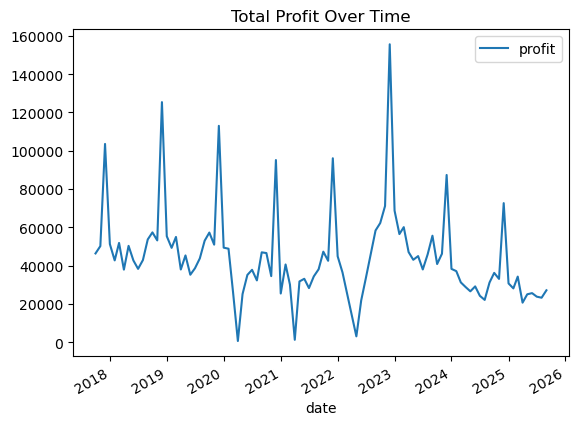

In [30]:
monthly_profit = (
    data.groupby(["year","month"])["profit"]
    .sum()
    .reset_index()
)
monthly_profit["date"] = pd.to_datetime(monthly_profit[["year","month"]].assign(day=1))
monthly_profit.plot(x="date", y="profit", title="Total Profit Over Time")

<Axes: title={'center': 'Profit per Category Over Time'}, xlabel='year,month'>

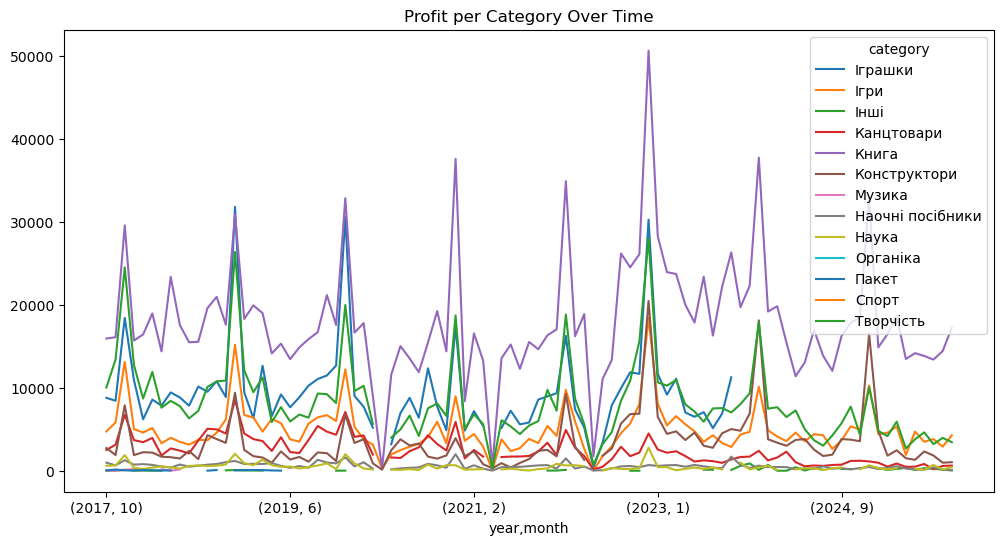

In [31]:
pivot_profit = data.pivot_table(
    index=["year","month"], columns="category", values="profit", aggfunc="sum"
)
pivot_profit.plot(figsize=(12,6), title="Profit per Category Over Time")

In [22]:
data.groupby(["year","category"])["profit"].sum().unstack().T

year,2017,2018,2019,2020,2021,2022,2023,2024,2025
category,,,,,,,,,
Іграшки,35603.34,130652.67,136652.84,89569.79,84256.57,87941.50,75704.11,NaN,NaN
Ігри,23642.04,61942.54,74036.07,45259.16,46361.11,49959.26,63572.11,56204.85,35376.10
Інші,150.33,166.89,92.90,34.30,139.49,44.88,2213.87,2527.61,1789.12
Канцтовари,12379.31,46750.07,47858.17,34369.52,25017.76,17841.73,20394.94,12827.62,5463.29
Книга,61534.43,226264.06,218925.64,182168.73,178068.61,188484.37,281415.54,207256.77,136390.50
Конструктори,12498.72,35707.86,25446.61,29613.37,24687.11,48494.07,69044.55,51552.48,18046.35
Музика,111.87,739.83,177.93,NaN,0.00,NaN,NaN,66.68,NaN
Наочні посібники,2879.89,8678.81,10022.60,6834.62,6108.02,3332.99,7618.32,4047.54,2231.35
Наука,3105.10,7297.05,8969.53,4155.92,2968.14,5068.72,3826.99,3049.76,2390.86
